In [1]:
import numpy as np
import pandas as pd

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv(r'E:\titanic dataset.csv')

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




# Performing Data Cleaning and Analysis

1. Understanding meaning of each column : Data Description
- variable - Description
- Survived - Survived (1) or died (0)
- Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - Passenger’s name
- Sex - Passenger’s sex
- Age - Passenger’s age
- SibSp - Number of siblings/spouses aboard
- Parch - Number of parents/children aboard (Some children travelled only with a nanny,      therefore parch=0 for them.)
- Ticket - Ticket number
- Fare - Fare
- Cabin - Cabin
- Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
  
2. Analysing which columns are completely useless in predicting the survival and deleting them.


Note - Don't just delete the columns because you are not finding it useful. Our focus is not deleting the columns. Our focus is on analysing
how each column is affecting the result or the prediction and in accordance, with that deciding whether to keep the column or to delete the
column or fill the null values of the column by some values and if yes, then what values.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# we have no relation with passenger name,ticket,fare,cabin lets drop it
data.drop(['Name'], axis=1, inplace=True)
data.drop(['Ticket'], axis=1, inplace=True)
data.drop(['Fare'], axis=1, inplace=True)
data.drop(['Cabin'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [23]:
#lets convert sex to numerical values
def getnumber(str):
    if str=='male':
        return 1
    else:
        return 0
data['Gender']=data['Sex'].apply(getnumber)
data.drop(['Sex'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,0
2,3,1,3,26.0,0,0,S,0
3,4,1,1,35.0,1,0,S,0
4,5,0,3,35.0,0,0,S,1


In [25]:
#lets check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

In [27]:
#lets fill the null values in age with mean of age
# if survived is 1 then fill with mean of age of survived people
# if survived is 0 then fill with mean of age of not survived people
survivedmeanage=data[data['Survived']==1]['Age'].mean()
not_survivedmeanage=data[data['Survived']==0]['Age'].mean()
data['age']=data['Age'].fillna(data['Survived'].apply(lambda x: survivedmeanage if x==1 else not_survivedmeanage))
data.drop(['Age'], axis=1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,0,38.0
2,3,1,3,0,0,S,0,26.0
3,4,1,1,1,0,S,0,35.0
4,5,0,3,0,0,S,1,35.0


In [29]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       2
Gender         0
age            0
dtype: int64

In [33]:
#lets check is embarked data is important or not
#i.e survived is dependent on embarked or not
survivedQ=data[data.Embarked=='Q'][data.Survived==1]
survivedS=data[data.Embarked=='S'][data.Survived==1]
survivedC=data[data.Embarked=='C'][data.Survived==1]
print("Survived Q: ",len(survivedQ))
print("Survived S: ",len(survivedS))
print("Survived C: ",len(survivedC))

Survived Q:  30
Survived S:  217
Survived C:  93


In [35]:
not_survivedQ=data[data.Embarked=='Q'][data.Survived==0]
not_survivedS=data[data.Embarked=='S'][data.Survived==0]
not_survivedC=data[data.Embarked=='C'][data.Survived==0]
print("Not Survived Q: ",len(not_survivedQ))
print("Not Survived S: ",len(not_survivedS))
print("Not Survived C: ",len(not_survivedC))

Not Survived Q:  47
Not Survived S:  427
Not Survived C:  75


In [37]:
# As there is significant difference based on the people survived from where they boarded the ship
# so we will keep embarked data as it is and null values are just 2 so we will drop them which is not a big deal
data.dropna(inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [57]:
#lets rename the columns for better understanding
data.rename(columns={'SibSp':'Siblings/Spouses','Parch':'Parents/Children','Pclass':'Passenger Class', 'Embarked':'Port of Boarding'},inplace=True)
data.rename(columns={'Gender':'Sex','age':'Age'}, inplace=True)
data.head()

,PassengerId,Survived,Passenger Class,Siblings/Spouses,Parents/Children,Port of Boarding,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,0,38.0
2,3,1,3,0,0,S,0,26.0
3,4,1,1,1,0,S,0,35.0
4,5,0,3,0,0,S,1,35.0


In [59]:
# lets convert embarked to numerical values
def getnumber(str):
    if str=='S':
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
data['Port of Boarding']=data['Port of Boarding'].apply(getnumber)
data.head()

,PassengerId,Survived,Passenger Class,Siblings/Spouses,Parents/Children,Port of Boarding,Sex,Age
0,1,0,3,1,0,1,1,22.0
1,2,1,1,1,0,3,0,38.0
2,3,1,3,0,0,1,0,26.0
3,4,1,1,1,0,1,0,35.0
4,5,0,3,0,0,1,1,35.0


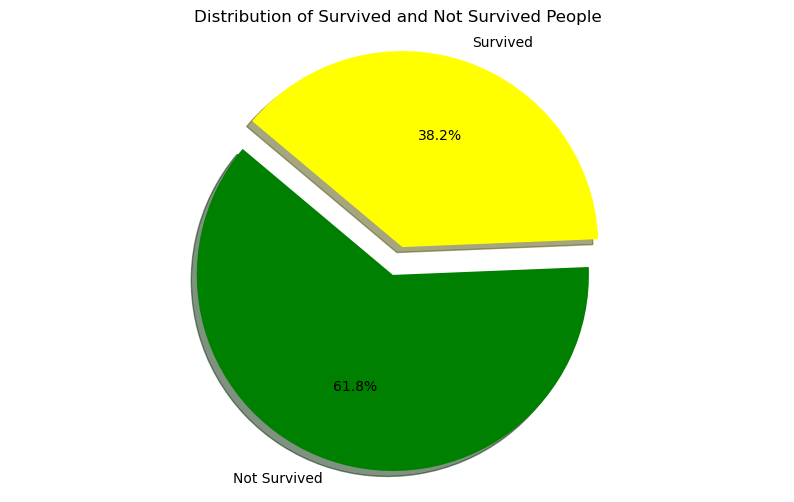

In [75]:
#lets draw a pie chart to see the distribution of survived and not survived people
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.pie(data['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors=['green', 'yellow'],explode=(0.15, 0),shadow=True)
# explode to separate the slices, colors to set custom colors
# value_counts() gives the count of unique values in the column
# autopct='%1.1f%%' to show percentage, startangle=140 to start the pie chart at a specific angle
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Survived and Not Survived People')
plt.show()

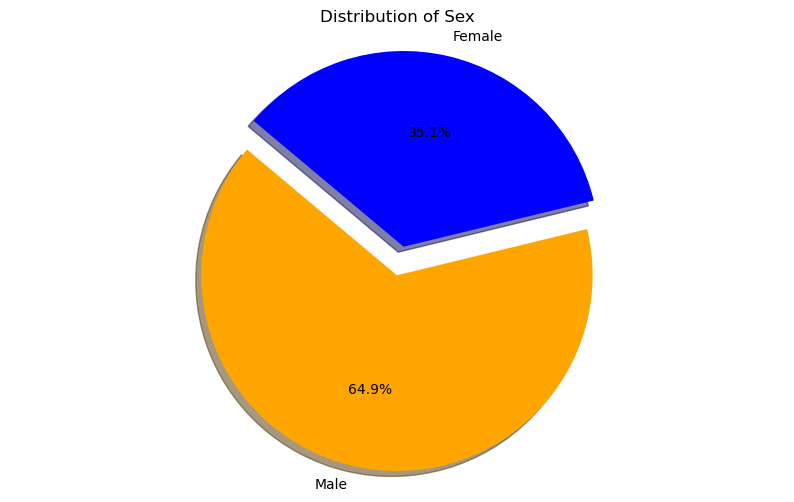

In [79]:
#pie chart among sex
plt.figure(figsize=(10,6))
plt.pie(data['Sex'].value_counts(), labels=('Male','Female'),autopct='%1.1f%%', startangle=140, colors=['orange','blue'],explode=(0.15, 0),shadow=True)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Sex')
plt.show()

In [81]:
# Lets divide more deeply male survived and not survived vs female survived and not survived
male_survived=data[data.Sex==1][data.Survived==1].shape[0]
male_notsurvived=data[data.Sex==1][data.Survived==0].shape[0]
female_survived=data[data.Sex==0][data.Survived==1].shape[0]
female_notsurvived=data[data.Sex==0][data.Survived==0].shape[0]

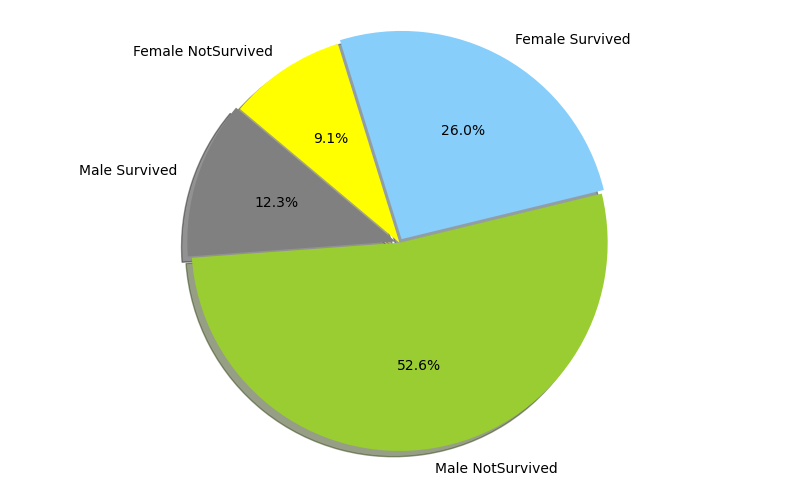

In [89]:
chart_data = [male_survived,male_notsurvived,female_survived,female_notsurvived]
labels = ['Male Survived','Male NotSurvived','Female Survived','Female NotSurvived']
colors = ['grey','yellowgreen','lightskyblue','yellow']
plt.figure(figsize=(10,6))
plt.pie(chart_data, labels=labels,autopct='%1.1f%%', startangle=140, colors=colors,explode=(0.02, 0,0.02, 0),shadow=True)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [91]:
data.columns

Index(['PassengerId', 'Survived', 'Passenger Class', 'Siblings/Spouses',
       'Parents/Children', 'Port of Boarding', 'Sex', 'Age'],
      dtype='object')

In [93]:
#lets divide into dependent and independent variables
x=data[['PassengerId', 'Passenger Class', 'Siblings/Spouses','Parents/Children', 'Port of Boarding', 'Sex', 'Age']] #independent variable
y=data[['Survived']] #dependent variable

In [95]:
x.head()

,PassengerId,Passenger Class,Siblings/Spouses,Parents/Children,Port of Boarding,Sex,Age
0,1,3,1,0,1,1,22.0
1,2,1,1,0,3,0,38.0
2,3,3,0,0,1,0,26.0
3,4,1,1,0,1,0,35.0
4,5,3,0,0,1,1,35.0


In [97]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [99]:
#lets split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) #80% training data and 20% testing data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((711, 7), (178, 7), (711, 1), (178, 1))